In [34]:
from astropy.table import  Table
def print_model(m):
    _comp = []
    _name = []
    _val = []
    _unit = []
    _err = []
    colnames = ['component', 'par name', 'value', 'units', 'error']
    for model_name in m.componentNames:
        fit_model = getattr(m, model_name)
        for name in fit_model.parameterNames:
            p = getattr(fit_model, name)
            _comp.append('%s' % (model_name))
            _name.append('%s' % (p.name))
            _val.append('%5.5f' % p.values[0])
            _unit.append('%s' % p.unit)
            _err.append('%5.5f' % p.sigma)

    t=Table([_comp, _name, _val, _unit, _err],names=colnames)
    print(t)

In [40]:
from future import *
import pprint
import xspec as xsp
xsp.Xset.allowPrompting 
xsp.AllModels.clear()
xsp.AllData.clear()
xsp.AllChains.clear()

s = xsp.Spectrum('data/spec.fits')

s.response = 'data/rmf.fits'
s.response.arf = 'data/arf.fits'

s.ignore('**-15')
s.ignore('300-**')
xsp.AllData.ignore('bad')

model_name = 'wabs*po'

m = xsp.Model(model_name)



In [41]:
print_model(m)

component par name  value  units  error 
--------- -------- ------- ----- -------
     wabs       nH 1.00000 10^22 0.00000
 powerlaw PhoIndex 1.00000       0.00000
 powerlaw     norm 1.00000       0.00000


In [42]:
xsp.Fit.query = 'yes'
xsp.Fit.perform()

In [43]:
print_model(m)

component par name  value   units  error  
--------- -------- -------- ----- --------
     wabs       nH  0.00004 10^22 -1.00000
 powerlaw PhoIndex  3.35376        0.35829
 powerlaw     norm 59.31030       76.31400


In [44]:
import matplotlib.pyplot as plt


In [45]:
xsp.Plot.device = '/null'

xsp.Plot.xLog = True
xsp.Plot.yLog = True
xsp.Plot.setRebin(10., 10)
xsp.Plot.xAxis = 'keV'
# Plot("data","model","resid")
# Plot("data model resid")
xsp.Plot("data,delchi")

chans = xsp.Plot.x()
rates = xsp.Plot.y()
folded = xsp.Plot.model()

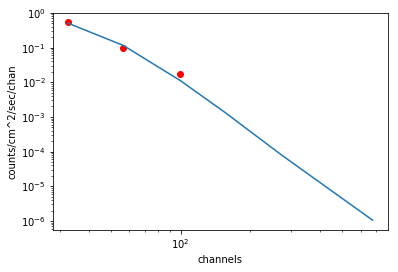

In [46]:
plt.loglog(chans, rates, 'ro', chans, folded)
plt.xlabel('channels')
plt.ylabel('counts/cm^2/sec/chan')
plt.savefig('myplot')